In [2]:
import numpy as np
from scipy import optimize as op
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
Data = pd.read_excel("Data.xlsx")
Data

,Corriente micro A,Grados,Amp,x,Corriente micro A.1,Grados.1,Amp.1,x.1,a
0,8.0,-15,10.0,-3.171106,20.0,0.0,8.0,0.000000,NaN
1,8.0,-14,NaN,-2.964078,17.0,5.0,NaN,0.794043,2.9
2,8.0,-13,NaN,-2.756148,5.5,10.0,NaN,1.582042,2.9
3,8.5,-12,NaN,-2.547378,1.5,15.0,NaN,2.358002,2.9
4,9.0,-11,NaN,-2.337832,4.0,20.0,NaN,3.116015,2.9
5,10.0,-10,NaN,-2.127574,8.5,25.0,NaN,3.850314,2.9
6,11.0,-9,NaN,-1.916668,6.0,30.0,NaN,4.555309,2.9
7,11.5,-8,NaN,-1.705178,1.5,35.0,NaN,5.225636,2.9
8,12.0,-7,NaN,-1.493169,0.0,40.0,NaN,5.856193,2.9
9,13.0,-6,NaN,-1.280705,0.0,45.0,NaN,6.442180,2.9


In [4]:
a = 2.9e-2
d = a*0.90625
lambda_ = 2.85
I0_single = (16.5/10)*1e-6
I0_double = (20)*1e-6

degrees_single = Data["Grados"]
degrees_double = Data["Grados.1"]

x_single = np.pi*a*np.sin(np.radians(degrees_single)).to_numpy()[1:]
x_double = np.pi*a*np.sin(np.radians(degrees_double)).to_numpy()[1:]

I_single = (Data["Corriente micro A"].to_numpy())[1:]*(1e-6)/10
I_double = (Data["Corriente micro A.1"].to_numpy())[1:]*(1e-6)/8

In [5]:
def single_slit(var,lambda_):
    return I0_single*(np.sin(var/lambda_)/(var/lambda_))**2 

def double_slit(var,lambda_):
    return I0_double*np.cos((d/a)*var/lambda_)**2 * (np.sin(var/lambda_)/(var/lambda_))**2

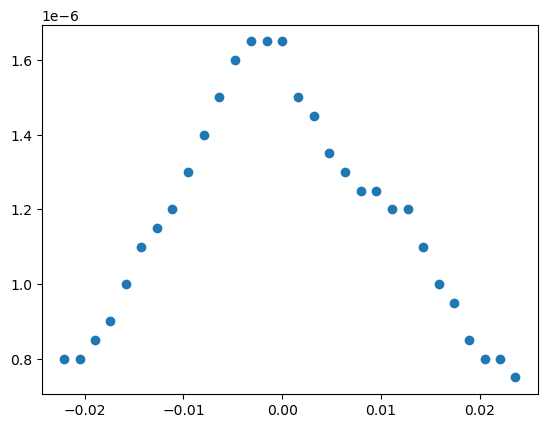

In [6]:
plt.scatter(x_single,I_single)

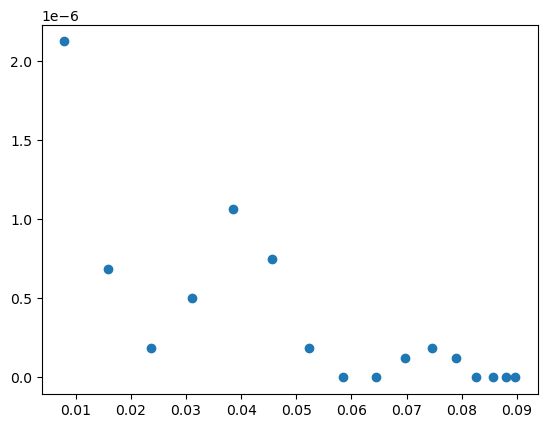

In [7]:
plt.scatter(x_double,I_double)

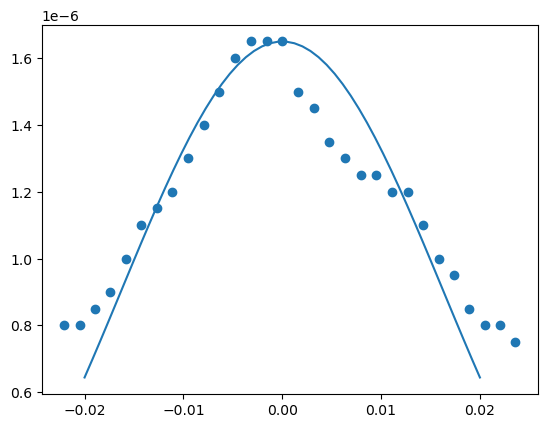

In [8]:
linspace_single = np.linspace(-0.02,0.02)
y_single = single_slit(linspace_single,1.25e-2)

plt.plot(linspace_single,y_single)
plt.scatter(x_single,I_single)
plt.savefig("single_slit.pdf")

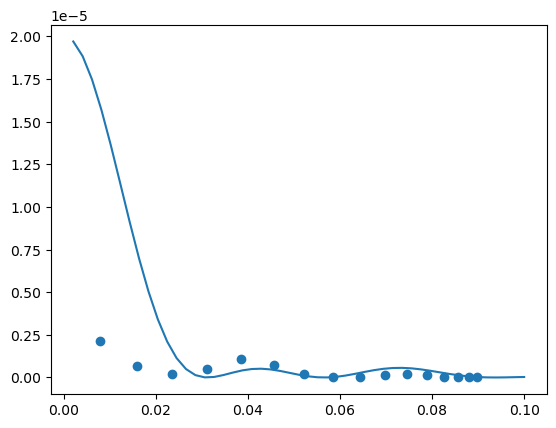

In [9]:
linspace_double = np.linspace(0,0.1)[1:]
y_double = double_slit(linspace_double,1.8e-2)

plt.plot(linspace_double,y_double)
plt.scatter(x_double,I_double)
plt.savefig("double_slit.pdf")